In [2]:
# import all packages
import scipy
import pandas
import scipy.optimize
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# read in some data we created for this example (.dat is a generic filename, it's just a text file)
example_data_1D = pandas.read_csv('1D_intro_examples.dat',sep=' ',header=0)#this file is separated by spaces and its first line contains the names of the columns (header) 
print(example_data_1D.head())

          x          y      error
0  0.585921  13.648840  10.321681
1  0.664152   7.321433  12.307353
2  0.666299   8.691450  11.459853
3  0.717126  -7.759708  14.261307
4  0.828552   8.019604  11.597092


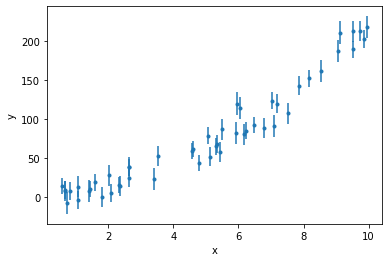

In [4]:
#Let's plot the data, with error bars, that we read from file (See Day 2)
plt.errorbar(example_data_1D['x'], #x,y,and error are the column names
             example_data_1D['y'], 
             yerr=example_data_1D['error'],#yerr denotes an error in the y-direction for plotting
             fmt='.') #fmt is "format", saying that I want data marked by "points"
plt.xlabel('x') #set the x-axis label 
plt.ylabel('y') #set the y-axis label
plt.show()

In [5]:
#The data were generated with a simple quadratic equation:
#ax^2+bx+c. 

def my_model(x,a,b,c): #We define the model described above
    return(a*x**2+b*x+c)

      fun: 45.91559799638657
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 4.26325641e-06, -4.97379915e-06, -3.55271368e-06])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 64
      nit: 10
   status: 0
  success: True
        x: array([1.9714524 , 1.64480291, 4.82669882])
Chi-square fit: 1.9714524016071087 1.6448029127555592 4.826698816268843
True: 2 1.3 6


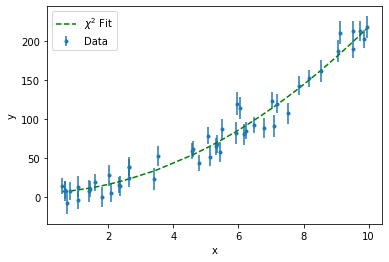

In [6]:
#Let's try and fit the data with a chi-square minimization
def chisq_likelihood(theta, args):
    #This function accepts an argument "theta", which is 
    #a list of model parameters a, b and c. It then calculates
    #a chi-square statistic that it returns, which compares
    #the observations, errors, and model provided in args.
    
    x, y, yerr,mod = args #args is a list, so this is the same as x=args[0],y=args[1],yerr=args[2]. x,y, and yerr are numpy arrays, mod is a function.
    a,b,c = theta #theta is also a list, so it follows the same as args above
    model_observations = mod(x,a,b,c) #mod (a model) is the 4th element of args, and it accepts x values, and the three model parameters a,b,c. Now model_observations contains the model values at every point in x (and is a numpy array)
    inv_sigma2 = 1./yerr**2 #The chi-square statistic contains an inverse-square error, which we calculate here
    chisquare = np.sum((y-model_observations)**2*inv_sigma2 )#calculate the chi-square statistic. 
    return chisquare

#Use scipy.optimize.minimize to minimize the chi-square, which
#is the same as maximizing the likelihood.
result = scipy.optimize.minimize(chisq_likelihood, #the first argument is the function to minimize, which must accept a list of parameters as its first argument, and any other necessary agruments as its second.
                                 x0=[1,1,1], #x0 is a first guess for each of your parameters (depends on your model/data)
                                 bounds=[(-100,100),(-100,100),(-100,100)], #optional bounds for each of your parameters
                                 args=[example_data_1D['x'],#the args passed to chisq_likelihood above
                                       example_data_1D['y'],
                                       example_data_1D['error'],
                                       my_model])#my_model is defined in a previous cell

print(result)#scipy.optimize.minimize returns a dictionary which I've called result. It has other information, the "x" element has the best fit values
a_ml,b_ml,c_ml = result["x"] #get our best fit values from result

#set up plotting the model over the data
plt.errorbar(example_data_1D['x'],
             example_data_1D['y'],
             yerr=example_data_1D['error'],
             fmt='.',
             label='Data')

plt.plot(example_data_1D['x'],
         my_model(example_data_1D['x'],a_ml,b_ml,c_ml),
         'g--',#make the line green and dashed
         label='$\chi^2$ Fit')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
print('Chi-square fit:',a_ml, b_ml,c_ml)
print('True:',a_true,b_true,c_true)
plt.show()